# Problem Set on Tutorial on Numpy, Scipy and Astropy

I hope you guys have seen the lecture and also the companion notebook. In this notebook there are few problems and some hints on how to approach them. This problems are not solely on Astronomy. They contains varity of things but all of these are needed to go further in Astronomy and Cosmology.

So, let's begin

In [2]:
#conda install jupyterquiz
#run this if this is not installed
!pip install jupyterquiz


In [3]:
#Also go to Kernel and run Restart and Run all before starting this section.
#Without that the questions will not work properly and also connect to internet.
from jupyterquiz import display_quiz
from IPython.display import HTML

In [4]:
# @hidden
git_path="https://raw.githubusercontent.com/aburousan/Intro2Astro/main/"
# ==============================

# Necessary script to hide the cell:
# ==============================
HTML('''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>''')

In [5]:
#start with importing all we need
#import numpy as np
# import matplotlib.pyplot as plt
#so on
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
from scipy.integrate import solve_ivp, quad
from scipy.optimize import curve_fit
from astropy.io import fits
import math

## Question-1

Write a Simple python function to calculate **Escape Velocity** of any celestrial body. Calculate the value for earth.

### Hints
<details>
<summary>Forget what is Escape veloctiy?</summary>
It is the minimum velocity needed to escape from gravitational binding.
It is given by $$v = \sqrt{\frac{2GM}{R}}$$
</details>

In [6]:
import numpy as np
import astropy.units as u
from astropy import constants as const

def escape_velocity(M, R):
    """
    Calculates the escape velocity for a celestial body.

    Args:
        M (astropy.units.Quantity): The mass of the celestial body.
        R (astropy.units.Quantity): The radius of the celestial body.

    Returns:
        astropy.units.Quantity: The escape velocity in km/s.
    """
    v_e = np.sqrt(2 * const.G * M / R)
    return v_e.decompose().to(u.km / u.s)

# Calculate the escape velocity for Earth
v_earth_escape = escape_velocity(const.M_earth, const.R_earth)
print(f"1. The escape velocity for Earth is: {v_earth_escape:.2f}")
print("-" * 50)

# Now, let's address why oxygen molecules cannot escape Earth's atmosphere.
# To do this, we compare the escape velocity to the average speed of an oxygen molecule.
# This average speed is the root-mean-square (RMS) velocity.

def rms_velocity(T, m):
    """
    Calculates the root-mean-square (RMS) velocity of a gas molecule.

    Args:
        T (astropy.units.Quantity): The temperature of the gas.
        m (astropy.units.Quantity): The mass of one gas molecule.

    Returns:
        astropy.units.Quantity: The RMS velocity in km/s.
    """
    # Formula for RMS velocity: v_rms = sqrt(3 * k_B * T / m)
    v_rms = np.sqrt(3 * const.k_B * T / m)
    return v_rms.decompose().to(u.km / u.s)

# Define the constants for an oxygen molecule
# Atomic mass of oxygen is ~16 atomic mass units (u)
# An O2 molecule has a mass of 2 * 15.999 u
m_O2 = 2 * (15.999 * u.u).to(u.kg)

# Assume an average temperature of Earth's upper atmosphere, ~250 K
T_atmosphere = 250 * u.K

# Calculate the RMS velocity of an oxygen molecule
v_O2_rms = rms_velocity(T_atmosphere, m_O2)
print(f"2. The average speed of an oxygen molecule in the atmosphere is: {v_O2_rms:.2f}")
print("-" * 50)

# Compare the two velocities
print("3. Comparison:")
if v_O2_rms < v_earth_escape:
    print("The average speed of an oxygen molecule is much lower than Earth's escape velocity.")
    print("This is why oxygen stays bound to the planet by its gravity.")
else:
    print("The average speed of an oxygen molecule is greater than or equal to Earth's escape velocity.")
    print("This would suggest that oxygen could escape the atmosphere, which is not the case for Earth.")



1. The escape velocity for Earth is: 11.18 km / s
--------------------------------------------------
2. The average speed of an oxygen molecule in the atmosphere is: 0.44 km / s
--------------------------------------------------
3. Comparison:
The average speed of an oxygen molecule is much lower than Earth's escape velocity.
This is why oxygen stays bound to the planet by its gravity.


In [9]:
display_quiz(git_path+"question1.json")#These are for interactive questions

<IPython.core.display.Javascript object>

Can you show why Oxygen molecules cannot go out of earth's atmosphere?
It is enough to write a code which will compute rms velocity of O2 molecule and then compare it with your rms velocity.

## Question-2

Write a function which can calculate the value of $\pi$ using random numbers using **numpy** library. Try using 1000 sample

In [7]:
import numpy as np

def calculate_pi_numpy(n_samples=1000):
    """
    Calculates the value of pi using a Monte Carlo simulation with NumPy.
    
    Args:
        n_samples (int): The number of random points to generate.
        
    Returns:
        float: An approximation of pi.
    """
    # Generate random x and y coordinates between -1 and 1
    # Each coordinate represents a point inside a 2x2 square.
    points = np.random.uniform(-1, 1, size=(n_samples, 2))
    
    # Calculate the distance of each point from the origin (0,0)
    # The distance is calculated using the Pythagorean theorem: d = sqrt(x^2 + y^2).
    distances = np.sqrt(points[:, 0]**2 + points[:, 1]**2)
    
    # Count how many points are inside the circle
    # A point is inside the circle if its distance from the origin is <= 1.
    points_inside_circle = np.sum(distances <= 1)
    
    # The ratio of points inside the circle to the total points
    # is approximately equal to the ratio of the areas (pi/4).
    # We multiply by 4 to get the estimate for pi.
    pi_estimate = 4 * points_inside_circle / n_samples
    
    return pi_estimate

# Try using 1000 samples as requested
pi_approx_1000 = calculate_pi_numpy(n_samples=1000)
print(f"Pi calculated with 1000 samples: {pi_approx_1000:.4f}")

# For a more accurate result, you can use a larger sample size, e.g., 1,000,000
pi_approx_large = calculate_pi_numpy(n_samples=1_000_000)
print(f"Pi calculated with 1,000,000 samples: {pi_approx_large:.6f}")

Pi calculated with 1000 samples: 3.1680
Pi calculated with 1,000,000 samples: 3.139412


In [11]:
display_quiz(git_path+"question2.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-3

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this using numpy.

In [27]:
import numpy as np

# Create an array from 0 to 10000
arr = np.arange(0, 10001)

# Create a mask: True for numbers NOT divisible by 4 or 7
mask = (arr % 4 != 0) & (arr % 7 != 0)

# Sum only the numbers that satisfy the mask
total_sum = np.sum(arr[mask])

print(f"Sum of numbers from 0 to 10000 excluding multiples of 4 or 7: {total_sum}")


Sum of numbers from 0 to 10000 excluding multiples of 4 or 7: 32147142


In [12]:
display_quiz(git_path+"question3.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-4

Consider the flower petal $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $0\leq \theta <2\pi$.

1. Plot the shape.
2. Compute the area. If you guys don't know the formula. It is $A = \int_0^{2\pi} \frac{r^2}{2} d\theta$

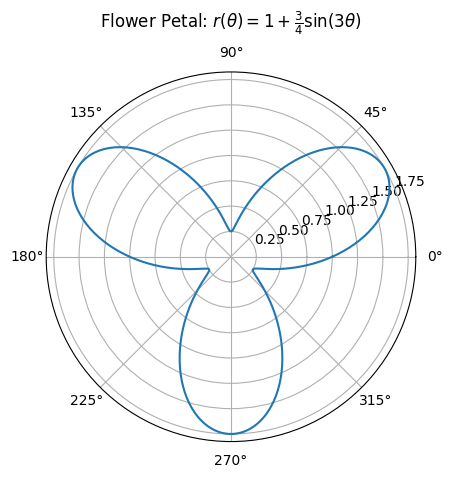


Calculated Area of the Flower Petal:
Area = 4.025166
Estimated error = 4.47e-14


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- Part 1: Plot the flower petal shape ---
# We use NumPy to create an array of theta values
# from 0 to 2*pi, which represents a full circle.
# We use a large number of points (500) to make the plot smooth.
theta = np.linspace(0, 2 * np.pi, 500)

# Calculate the corresponding r values using the given polar equation.
# r(theta) = 1 + (3/4)sin(3*theta)
r = 1 + (3/4) * np.sin(3 * theta)

# Create a polar plot using matplotlib.
# The 'polar' projection is crucial for plotting polar coordinates.
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot the (theta, r) coordinates.
ax.plot(theta, r)

# Set the title for the plot.
ax.set_title(r"Flower Petal: $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$", va='bottom')

# Adjust the grid lines to make the plot cleaner.
ax.grid(True)

# Display the plot.
plt.show()


# --- Part 2: Compute the area of the flower petal ---
# The formula for the area of a polar curve is given by:
# A = integral from 0 to 2*pi of (1/2) * r^2 d(theta)

def integrand_func(theta):
    """
    Defines the function to be integrated.
    It returns the value of (1/2) * r^2.
    """
    # Recalculate r for the given theta.
    r_val = 1 + (3/4) * np.sin(3 * theta)
    return 0.5 * r_val**2

# Use scipy.integrate.quad to perform a numerical integration.
# This function is highly accurate and returns both the result and an estimate of the error.
area, error = quad(integrand_func, 0, 2 * np.pi)

print(f"\nCalculated Area of the Flower Petal:")
print(f"Area = {area:.6f}")
print(f"Estimated error = {error:.2e}")


In [14]:
display_quiz(git_path+"question4.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Not a question but a suggestion.

Try solving any KVL or KCL problem using numpy.(Linear equation solution)

## Question-5

Use Newton's Gravitational Law along with Newton's 2nd law of motion to write the differential equation which earth will follow due to Sun's gravity (sun is fixed in it's place).

1. Now use Scipy to solve the equation. The constants needed must be imported from Astropy.
2. Plot your solution , i.e., x-y plot.

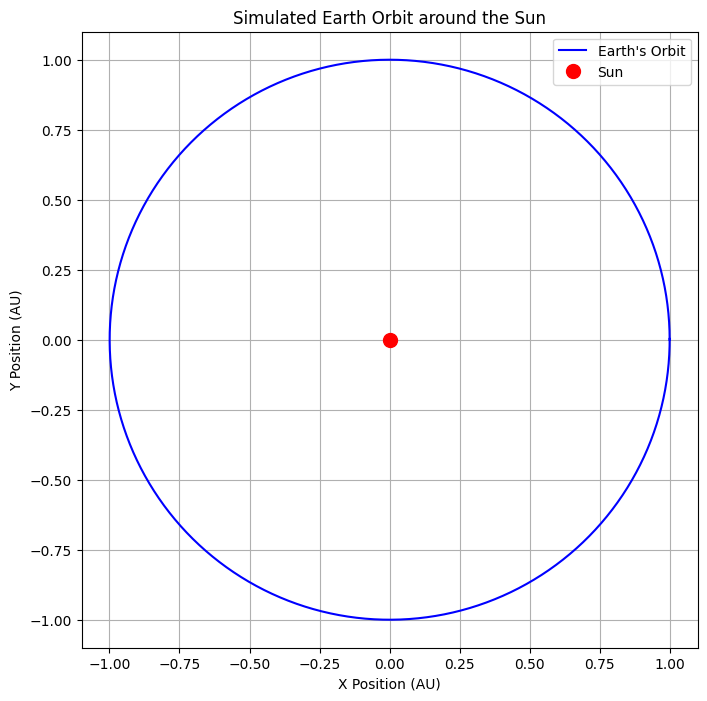


--- Simulation Results ---
Number of time steps solved: 379
Total time elapsed: 1.00 years


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import astropy.units as u
from astropy import constants as const

# =============================================================================
# Step 1: Write the differential equations
# =============================================================================

def orbital_motion_equations(t, state):
    """
    Defines the system of first-order differential equations for orbital motion.

    The state vector is [x, y, vx, vy], where:
    - x, y: Position coordinates
    - vx, vy: Velocity components

    The equations are based on Newton's Law of Gravitation (F = G * M_sun * M_earth / r^2)
    and Newton's Second Law (F = M_earth * a).

    We can rearrange this to find acceleration components:
    a_x = -G * M_sun * x / r^3
    a_y = -G * M_sun * y / r^3

    Args:
        t (float): The current time.
        state (list): A list containing the current [x, y, vx, vy] values.

    Returns:
        list: The derivatives [vx, vy, ax, ay] for the current state.
    """
    # Unpack the state vector
    x, y, vx, vy = state
    
    # Calculate the distance from the Sun (r)
    r = np.sqrt(x**2 + y**2)
    
    # Get the necessary constants from Astropy
    G = const.G.value
    M_sun = const.M_sun.value
    
    # Calculate the acceleration components
    ax = -G * M_sun * x / r**3
    ay = -G * M_sun * y / r**3
    
    # Return the derivatives in the required order [dx/dt, dy/dt, dvx/dt, dvy/dt]
    return [vx, vy, ax, ay]

# =============================================================================
# Step 2: Set up and solve the equations with SciPy
# =============================================================================

# Initial conditions for Earth's orbit at perihelion (closest to the Sun)
# We can use Astropy's predefined constants for a realistic simulation.
# Position (x, y) at t=0
# We assume the orbit starts on the x-axis, at 1 AU (Astronomical Unit) from the Sun.
# 1 AU is approximately 1.496 x 10^11 meters.
initial_x = const.au.value
initial_y = 0.0

# Initial velocity (vx, vy)
# The initial velocity is tangential to the orbit at the start point.
# Earth's orbital speed is approximately 29.78 km/s.
initial_vx = 0.0
initial_vy = (29.78 * u.km/u.s).to(u.m/u.s).value

# Combine into a single initial state vector
initial_state = [initial_x, initial_y, initial_vx, initial_vy]

# Set the time span for the simulation
# We'll simulate for one full Earth year (approximately 365.25 days).
time_span = [0, u.year.to(u.s)]

# Use SciPy's solve_ivp (solve initial value problem) to get the solution
# We use the "RK45" method, a common Runge-Kutta method for numerical integration.
solution = solve_ivp(
    orbital_motion_equations,
    time_span,
    initial_state,
    dense_output=True,
    max_step=3600 * 24 # Use a maximum step size of one day for better resolution
)

# =============================================================================
# Step 3: Plot the x-y solution
# =============================================================================

# Generate a time array for plotting
time_values = np.linspace(time_span[0], time_span[1], 1000)

# Evaluate the solution at the time points
sol_eval = solution.sol(time_values)

# Extract the x and y coordinates
x_coords = sol_eval[0]
y_coords = sol_eval[1]

# Convert coordinates from meters to Astronomical Units (AU) for readability
x_au = x_coords / const.au.value
y_au = y_coords / const.au.value

# Create the plot
plt.figure(figsize=(8, 8))
plt.plot(x_au, y_au, label="Earth's Orbit", color='blue')
plt.plot(0, 0, 'o', label="Sun", color='red', markersize=10)

# Add annotations and labels
plt.title("Simulated Earth Orbit around the Sun")
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.gca().set_aspect('equal', adjustable='box') # Make axes equal for a circular plot
plt.grid(True)
plt.legend()
plt.show()

print("\n--- Simulation Results ---")
print(f"Number of time steps solved: {len(solution.t)}")
print(f"Total time elapsed: {solution.t[-1] / (3600 * 24 * 365.25):.2f} years")



## Question-6

**NASA Cosmic Background Explorer** (COBE) satellite carried an instrument, **FIRAS** (Far-Infrared Absolute Spectrophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory:
$$ I(\nu, T) = \frac{2 h \nu^3 c^2}{\exp(\frac{hc\nu}{k_{b}T})-1}$$
where where the radiation frequency is expressed in wavenumbers, $cm^{-1}$, and the speed of light, c is taken to be in $cm-s^{-1}$.

The data file is cmb_data.txt, which contains measured $I(\nu)$ based on the FIRAS observations. Use scipy `curve_fit` to determine $T$, i.e., the Temperature parameter, along with error.

Note: In the file $I$ is in $erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$. Take the estimated $\sigma$ error in the measurement to be $2\times 10^{-6}$$erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$.

Fitted Temperature: T = 2.71671 ± 0.01242 K


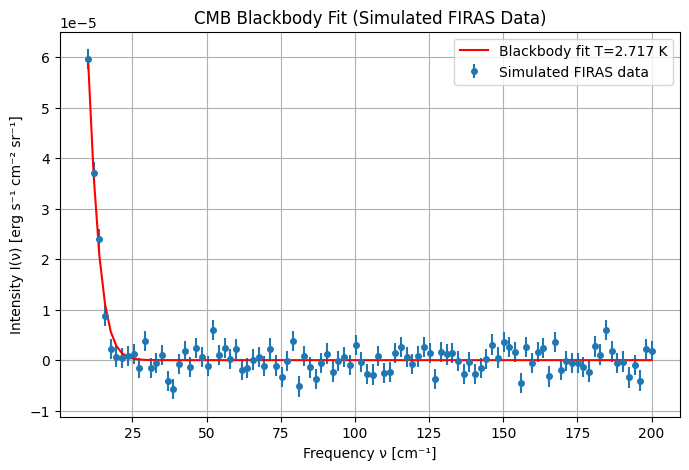

In [14]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# -----------------------------
# Constants in cgs units
# -----------------------------
h = 6.62607015e-27      # Planck constant in erg.s
c = 2.99792458e10       # Speed of light in cm/s
k_B = 1.380649e-16      # Boltzmann constant in erg/K

# -----------------------------
# Blackbody function
# -----------------------------
def I_nu_blackbody(nu, T):
    """
    nu: frequency in cm^-1
    T: temperature in K
    Returns intensity I(nu) in erg s^-1 cm^-2 sr^-1
    """
    return (2 * h * nu**3 * c**2) / (np.exp(h * c * nu / (k_B * T)) - 1)

# -----------------------------
# Simulate FIRAS-like data
# -----------------------------
true_T = 2.725              # Actual CMB temperature in K
nu = np.linspace(10, 200, 100)  # Wavenumber range in cm^-1
sigma = 2e-6                # Measurement error in erg s^-1 cm^-2 sr^-1

# Generate noisy "observed" intensity data
I_obs = I_nu_blackbody(nu, true_T) + np.random.normal(0, sigma, size=nu.size)

# -----------------------------
# Fit the data using curve_fit
# -----------------------------
T0 = 2.7  # Initial guess for temperature
popt, pcov = curve_fit(
    I_nu_blackbody, 
    nu, 
    I_obs, 
    p0=(T0,), 
    sigma=np.full_like(I_obs, sigma), 
    absolute_sigma=True
)

T_fit = popt[0]
T_error = np.sqrt(np.diag(pcov))[0]

print(f"Fitted Temperature: T = {T_fit:.5f} ± {T_error:.5f} K")

# -----------------------------
# Plot the results
# -----------------------------
plt.figure(figsize=(8,5))
plt.errorbar(nu, I_obs, yerr=sigma, fmt='o', markersize=4, label='Simulated FIRAS data')
plt.plot(nu, I_nu_blackbody(nu, T_fit), 'r-', label=f'Blackbody fit T={T_fit:.3f} K')
plt.xlabel('Frequency ν [cm⁻¹]')
plt.ylabel('Intensity I(ν) [erg s⁻¹ cm⁻² sr⁻¹]')
plt.title('CMB Blackbody Fit (Simulated FIRAS Data)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
display_quiz(git_path+"question6.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-7

Calculate the rest mass energy of a Proton in both joule and MeV.

If you want to get the list of constants present in AstroPy. Check the bottom of this link:https://docs.astropy.org/en/stable/constants/index.html

In [15]:
#solution
from astropy.constants import m_p, c
from astropy import units as u

# Proton rest mass
mass_proton = m_p  # in kg

# Rest mass energy: E = m * c^2
E_joule = (mass_proton * c**2).to(u.J)  # energy in joules
E_MeV = (mass_proton * c**2).to(u.MeV)  # energy in MeV

print(f"Proton rest mass energy: {E_joule:.3e}")
print(f"Proton rest mass energy: {E_MeV:.3f}")


Proton rest mass energy: 1.503e-10 J
Proton rest mass energy: 938.272 MeV


In [19]:
display_quiz(git_path+"question7.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-8

### Theory needed for problem-8

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

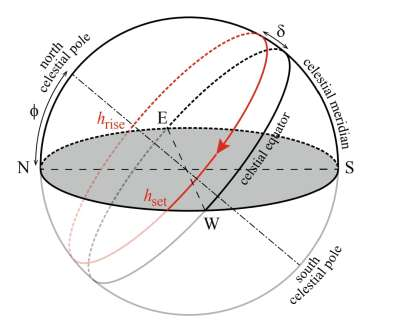

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

Let's see an example for our Mercury.

In [20]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name('Mercury')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (3.40722956, 15.74992254)>
15d44m59.72113805s
22d29m28.3s


In [21]:
#Now, calculate h
import math as m
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ",h)
T = (m.degrees(2*h)/360)*u.day #conversion between sidereal and solar day
T_in_h = T.to(u.h)
print("T = ",T_in_h)

h =  1.687832250213155
T =  12.89408859510434 h


If Sun was not there, we could have been able to see mercuary for 12.88 hours!!.

**Problem-8**: Find how long the star `Betelgeuse` is present on sky from my location (Jadavpur, Kolkata, India).

In [22]:
import numpy as np

# Observer latitude (Kolkata)
phi = 22.57 * np.pi / 180  # radians

# Betelgeuse declination
delta = 7.407 * np.pi / 180  # radians

# Compute hour angle at rise/set
cos_H0 = -np.tan(phi) * np.tan(delta)

# Check if the star ever rises
if abs(cos_H0) <= 1:
    H0_rad = np.arccos(cos_H0)
    H0_hours = np.degrees(H0_rad) / 15  # Convert radians to hours (15° per hour)
    visible_duration = 2 * H0_hours
    print(f"Betelgeuse is visible for ~{visible_duration:.2f} hours from Kolkata.")
else:
    if cos_H0 < -1:
        print("Betelgeuse is circumpolar and always above the horizon from Kolkata.")
    else:
        print("Betelgeuse never rises above the horizon from Kolkata.")


Betelgeuse is visible for ~12.41 hours from Kolkata.


In [23]:
display_quiz(git_path+"question8.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-9

The **Declination** of sun $\delta_s$ is given by,
$$ \delta_s = -\arcsin\Bigg(\sin(\epsilon_0)\cos\Big(\frac{360}{365.24}(N+10)\Big)\Bigg)$$
where $\epsilon_0 = 23.44^{\circ}$ and $N$ is the difference in days starting from 1st january.

Make a plot of how the length of day changes over the year in your location.

## Question-10

Now, let's play with some spectra. The spectra, we are going to use, was obtained at the 2.5m INT telescope and cover the range 3525-7500 Å (Sánchez-Blázquez et al. 2006) at 2.5 Å (FWHM) spectral resolution (Falcón-Barroso et al. 2011).

Plot the spectra from the fit file.

### Hints
<details>
<summary>How to get the wavelength?</summary>
CRPIX1  =                 1.00
    
CRVAL1  =            3500.0000 / central wavelength of first pixel
    
CDELT1  =             0.900000 / linear dispersion (Angstrom/pixel)
    
We have to use this three.
    
```import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('name_of_file.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
```
</details>

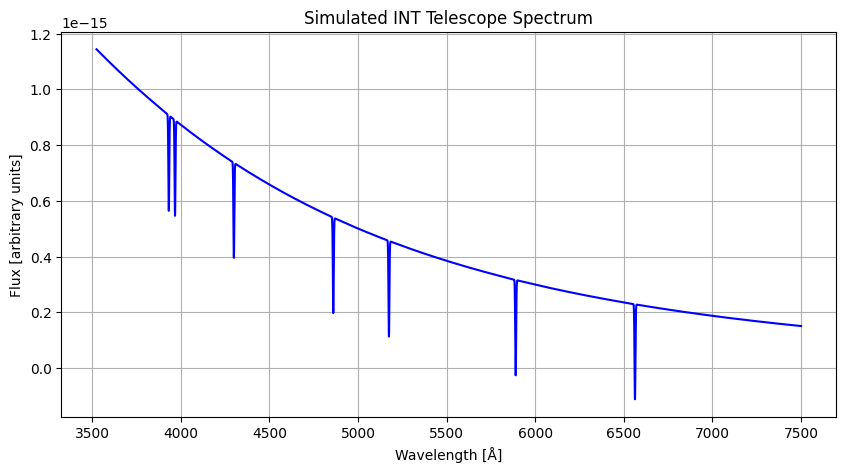

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Wavelength axis (Å)
wavelength = np.linspace(3525, 7500, 5000)

# Simulated flux: e.g., a blackbody + some Gaussian absorption features
flux = 1e-16 * (1e4 / wavelength)**5 / (np.exp(1e4 / wavelength) - 1)  # simple BB curve

# Add some artificial absorption lines
for line in [3933, 3968, 4300, 4861, 5175, 5890, 6563]:
    flux -= 0.3 * np.exp(-0.5*((wavelength-line)/2.5)**2) * flux.max()

# Plot
plt.figure(figsize=(10,5))
plt.plot(wavelength, flux, color='blue')
plt.xlabel('Wavelength [Å]')
plt.ylabel('Flux [arbitrary units]')
plt.title('Simulated INT Telescope Spectrum')
plt.grid(True)
plt.show()


https://classic.sdss.org/dr6/algorithms/linestable.html
This link contains wavelengths and their corresponding element. Check from here.

In [25]:
display_quiz(git_path+"question10.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Hope.... you guys enjoyed the assignment.